In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.formula.api as smf

In [53]:
df = pd.read_csv(r"./data.csv")
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Area
0,China,115466.0,1938.0,4636.0,NaN,103600.0,169.0,7230.0,6.0,80.0,3.0,160000000.0,111163.0,1.439324e+09,Asia
1,USA,81174677.0,5143.0,993811.0,118.0,56071103.0,155965.0,24109763.0,4250.0,242828.0,2973.0,964386655.0,2884885.0,3.342894e+08,North America
2,India,42993494.0,2503.0,515907.0,57.0,42441449.0,4377.0,36138.0,8944.0,30644.0,368.0,778520151.0,554906.0,1.402977e+09,Asia
3,Brazil,29368776.0,18397.0,655139.0,146.0,27742324.0,70731.0,971313.0,8318.0,136524.0,3045.0,63776166.0,296471.0,2.151179e+08,South America
4,France,23514144.0,60422.0,140109.0,29.0,22163944.0,17144.0,1210091.0,1928.0,358895.0,2138.0,246629975.0,3764303.0,6.551811e+07,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Macao,82.0,NaN,NaN,NaN,79.0,NaN,3.0,NaN,123.0,NaN,5318.0,8005.0,6.643200e+05,Asia
218,Samoa,48.0,2.0,NaN,NaN,28.0,NaN,20.0,NaN,239.0,NaN,NaN,NaN,2.006460e+05,Australia/Oceania
219,Vatican City,29.0,NaN,NaN,NaN,28.0,NaN,1.0,NaN,36070.0,NaN,NaN,NaN,8.040000e+02,Europe
220,Western Sahara,10.0,NaN,1.0,NaN,8.0,NaN,1.0,NaN,16.0,2.0,NaN,NaN,6.221860e+05,Africa


In [54]:
df.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
count,2.220000e+02,132.000000,216.000000,83.000000,2.100000e+02,112.000000,2.110000e+02,161.000000,222.000000,216.000000,2.110000e+02,2.110000e+02,2.220000e+02
mean,2.064034e+06,10227.969697,28082.587963,43.349398,1.829673e+06,10270.285714,2.477480e+05,406.434783,128482.270270,1116.532407,2.821376e+07,1.793209e+06,3.552697e+07
std,7.092662e+06,39324.451095,97482.693198,85.990986,5.877715e+06,25112.240214,1.699830e+06,1186.719363,135266.042259,1183.141333,1.020735e+08,3.126129e+06,1.400812e+08
min,1.000000e+00,1.000000,1.000000,1.000000,8.000000e+00,1.000000,1.000000e+00,1.000000,16.000000,2.000000,3.092000e+03,5.109000e+03,8.040000e+02
25%,2.412325e+04,32.000000,254.250000,3.000000,1.547900e+04,48.500000,4.020000e+02,6.000000,11750.250000,170.250000,3.467785e+05,1.484915e+05,6.236898e+05
50%,1.625885e+05,289.000000,2250.000000,9.000000,1.300340e+05,608.500000,7.015000e+03,30.000000,86648.000000,735.000000,2.026898e+06,7.079720e+05,6.234938e+06
75%,1.016405e+06,2516.000000,13702.000000,42.000000,9.194575e+05,5974.750000,6.900700e+04,218.000000,212378.250000,1796.500000,1.182002e+07,1.911226e+06,2.338554e+07
max,8.117468e+07,350176.000000,993811.000000,596.000000,5.607110e+07,155965.000000,2.410976e+07,8944.000000,696199.000000,6268.000000,9.643867e+08,2.167174e+07,1.439324e+09


## Tình hình Covid thế giới

### Biểu đồ quan hệ giữa các thông số ca nhiễm

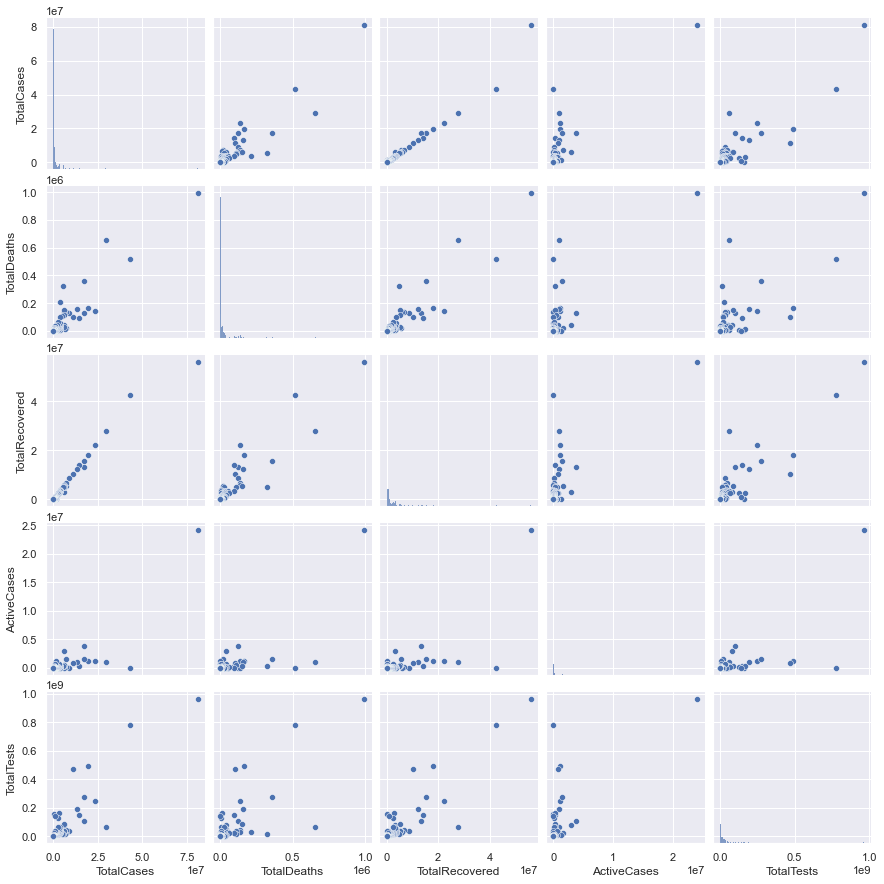

In [55]:
col = ['TotalCases','TotalDeaths','TotalRecovered','ActiveCases', 'TotalTests']
sns.pairplot(df[col]);

- Lí do chọn Scatter chart: để quan sát và thể hiện mối quan hệ giữa hai biến số. Các dấu chấm trong biểu đồ phân tán không chỉ thể hiện giá trị của một điểm dữ liệu mà còn thể hiện xu hướng khi chúng ta nhìn tổng thể toàn bộ tập dữ liệu.
- Ý nghĩa:
    - Chúng ta có thể nhìn thấy một số cặp thuộc tính dường như là có quan hệ nhân quả (tuyến tính) với nhau, cụ thể là: (TotalCases,TotalDeaths), (TotalCases, TotalRecovered), (TotalCases, TotalTests) => để biết được cụ thể chúng ta sẽ dùng học máy để khảo sát và kiểm chứng các mối quan hệ này.

### Mô hình hồi quy tuyến tính cho các mối quan hệ

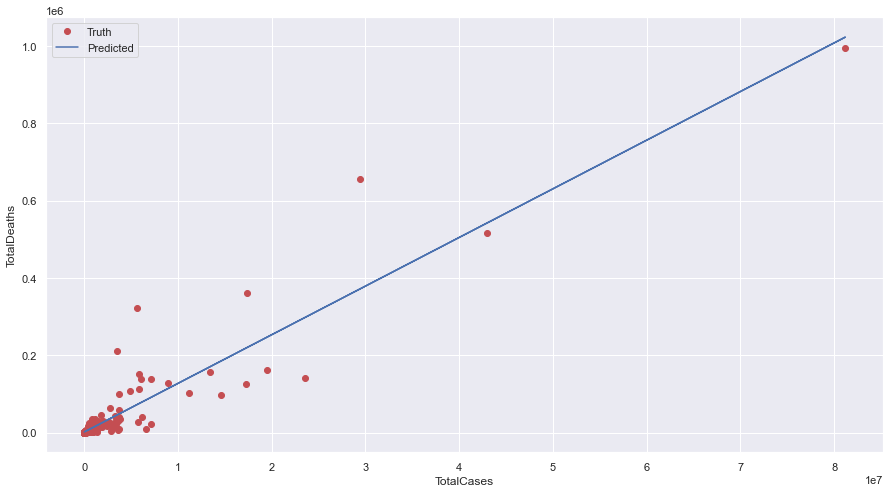

Mức độ biểu diễn của biến TotalCases cho biến TotalDeaths là: 0.859849026089327


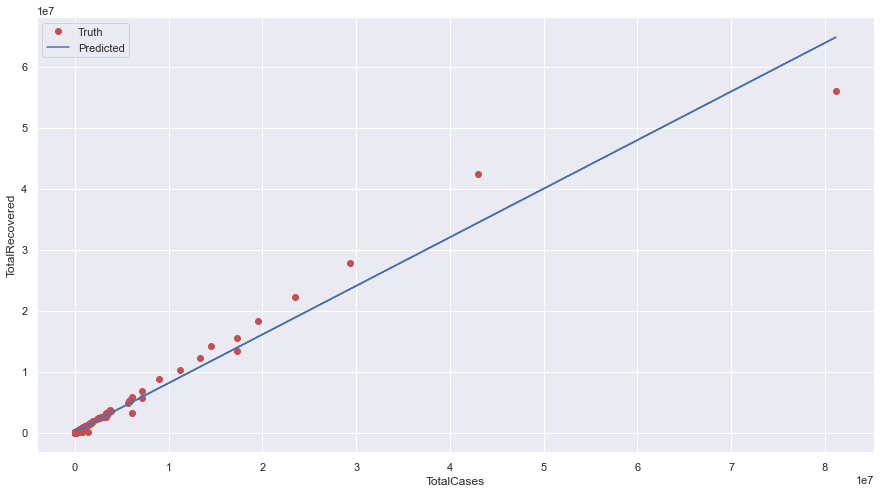

Mức độ biểu diễn của biến TotalCases cho biến TotalRecovered là: 0.971840274869155


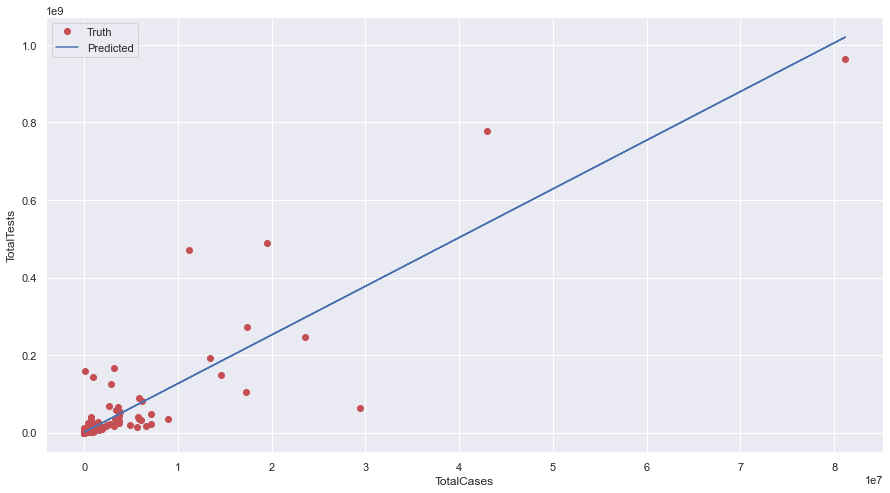

Mức độ biểu diễn của biến TotalCases cho biến TotalTests là: 0.7973458966140448


In [56]:
def LRV(x,y):
    query = y + " ~ " + x
    results = smf.ols(query, data=df).fit()
    plt.plot(df[x],df[y],'ro',label='Truth')
    plt.plot(df[x],results.predict(df[x]),label='Predicted')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()
    print(f"Mức độ biểu diễn của biến {x} cho biến {y} là: {results.rsquared}")

LRV("TotalCases","TotalDeaths")
LRV("TotalCases","TotalRecovered")
LRV("TotalCases","TotalTests")

- Như vậy thông qua khảo sát, ta có thể thấy được khả năng biểu diễn của biến TotalCases cho các biến TotalDeaths, TotalRecovered, TotalTests đều rất cao => Chúng ta hoàn toàn có thể dự đoán gần đúng được số ca tử vong/hồi phục/tests dựa vào tổng số ca nhiễm.

### Biểu đồ thể hiện các thông tin thống kê của các thông số ca nhiễm

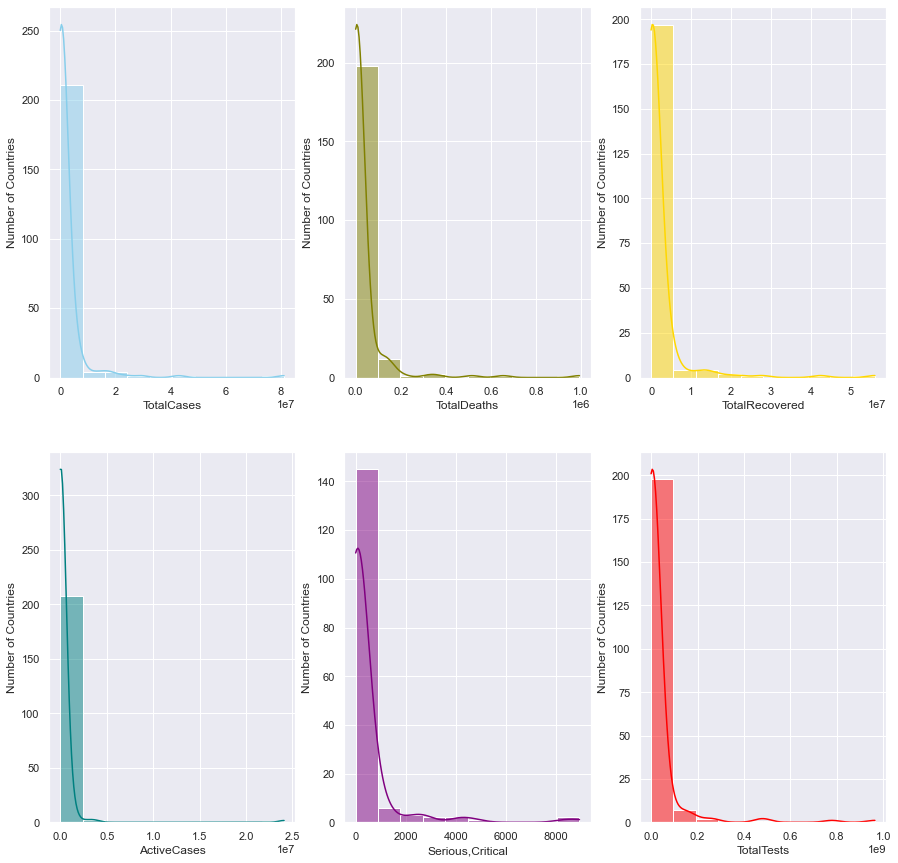

In [57]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

sns.histplot(data=df, x="TotalCases", kde=True, color="skyblue", ax=axs[0, 0], bins=10).set_ylabel("Number of Countries")
sns.histplot(data=df, x="TotalDeaths", kde=True, color="olive", ax=axs[0, 1], bins=10).set_ylabel("Number of Countries")
sns.histplot(data=df, x="TotalRecovered", kde=True, color="gold", ax=axs[0, 2], bins=10).set_ylabel("Number of Countries")
sns.histplot(data=df, x="ActiveCases", kde=True, color="teal", ax=axs[1, 0], bins=10).set_ylabel("Number of Countries")
sns.histplot(data=df, x="Serious,Critical", kde=True, color="purple", ax=axs[1, 1], bins=10).set_ylabel("Number of Countries")
sns.histplot(data=df, x="TotalTests", kde=True, color="red", ax=axs[1, 2], bins=10).set_ylabel("Number of Countries");


- Lí do chọn histogram: thể hiện được phân bố mật độ các giá trị của thuộc tính trên tổng số quốc gia
- Ý nghĩa:
    - Ta có thể thấy được hình dạng phân bố mật độ các giá trị của các thuộc tính trên tổng số quốc gia là khá tương đồng nhau, đều lệch hoàn toàn về phía bên trái của biểu đồ => phần lớn các nước trên thế giới đều có các giá trị của các thuộc tính liên quan đến Covid 19 đều ở mức thấp, còn lại chỉ có phần ít các nước là có giá trị thuộc tính ở mức cao
    - Trong đó:
        - Tổng số ca nhiếm: giá trị thường xuyên xuất hiện nhất (mode) là dưới 10^7 ca
        - Tổng số ca tử vong: giá trị thường xuyên xuất hiện nhất (mode) là dưới 10^5 ca
        - Tổng số ca hồi phục: giá trị thường xuyên xuất hiện nhất (mode) là dưới 10^7 ca
        - Số ca đang nhiễm: giá trị thường xuyên xuất hiện nhất (mode) là dưới 10^6 ca
        - Số ca đang nghiêm trọng, nguy hiểm: giá trị thường xuyên xuất hiện nhất (mode) là dưới 10^3 ca
        - Tổng số lần test: giá trị thường xuyên xuất hiện nhất (mode) là dưới 10^8

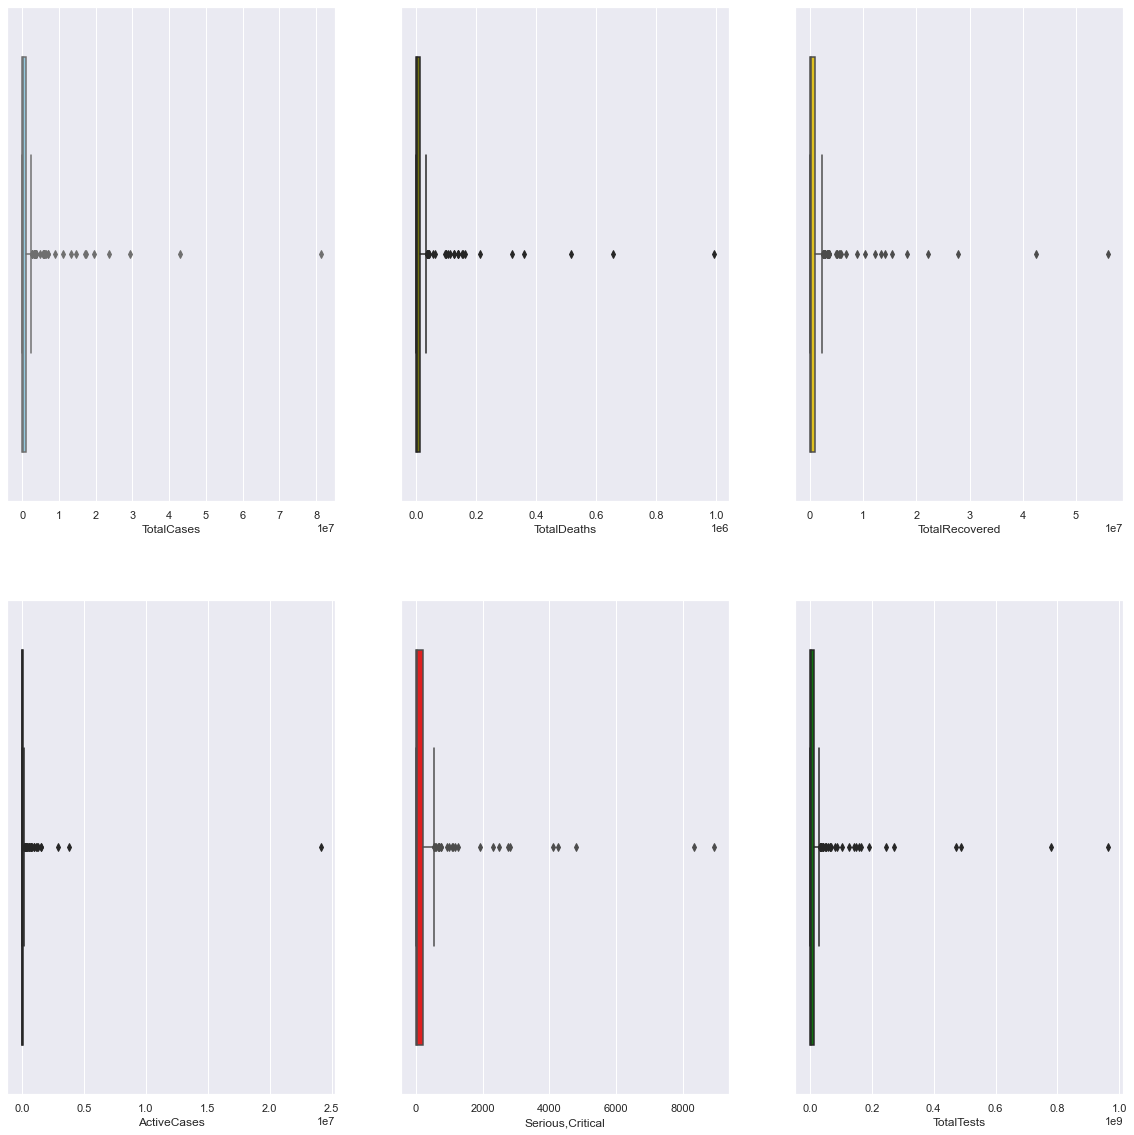

In [58]:
fig, axs = plt.subplots(2, 3, figsize=(20, 20))

sns.boxplot(data=df, x="TotalCases", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="TotalDeaths", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="TotalRecovered", color="gold", ax=axs[0, 2])
sns.boxplot(data=df, x="ActiveCases", color="purple", ax=axs[1, 0]) 
sns.boxplot(data=df, x="Serious,Critical", color="red", ax=axs[1, 1]) 
sns.boxplot(data=df, x="TotalTests", color="green", ax=axs[1, 2]);

- Lí do chọn Boxplot: Thể hiện được các thông tin thống kê quan trọng như kì vọng, độ lệch chuẩn, các ngoại lệ, ...
- Ý nghĩa:
    - Ta có thể thấy được tất cả các thuộc tính trên đều tồn tại rất nhiều ngoại lệ, điều này có nghĩa là có một số nước có tình hình nhiễm covid đặc biết nghiêm trọng hơn hầu hết các nước còn lại.

### Top 10 nước về các thông số

In [59]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col, na_position="first").tail(10), 
                 x=col, y="Country,Other", color='Area',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [60]:
plot_hbar(df, 'TotalCases', 10)

In [61]:
plot_hbar(df, 'TotalDeaths', 10)

In [62]:
plot_hbar(df, 'TotalRecovered', 10)

- Lí do chọn bar chart: để xếp hạng thông số của các quốc gia và dễ dàng so sánh sự chênh lệch giữa chúng
- Ý nghĩa:
    - Ta có thể thấy các nước chịu ảnh hưởng nặng nề nhất lại là các nước có nền kinh tế tương đối phát triển, đặc biệt là ở khu vực Châu Âu
    - Điều này có thể là do ở thời điểm dịch bùng phát, các nước này chưa nhận thấy được tầm ảnh hưởng nghiêm trọng của đại dịch nên chưa có chính sách đối phó hợp lý

## Tình hình covid theo khu vực

### Thông số ca tử vong, ca hồi phục, ca dương tính theo từng khu vực so với tổng số ca nhiễm

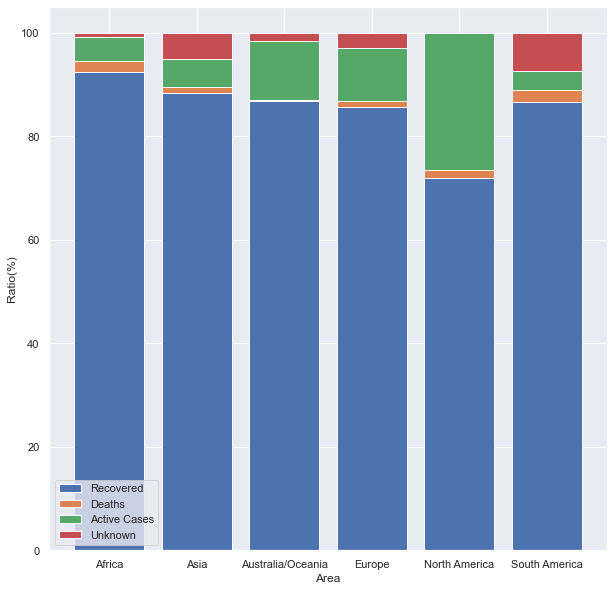

In [63]:
plt.figure(figsize=(10,10))

df_groupedby = df.groupby("Area")[['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']].sum()

totalDeaths = df_groupedby['TotalDeaths']
totalRecovered = df_groupedby['TotalRecovered']
totalActiveCases = df_groupedby['ActiveCases']
totalCases = df_groupedby['TotalCases']

DeathsRatio = (totalDeaths/totalCases) * 100
RecoveredRatio = (totalRecovered/totalCases) * 100
ActiveCasesRatio = (totalActiveCases/totalCases) * 100
Unknown = 100 - (DeathsRatio+RecoveredRatio+ActiveCasesRatio)

plt.xlabel('Area')
plt.ylabel('Ratio(%)')


p1 = plt.bar(df_groupedby.index,RecoveredRatio,label='Recovered')
p2 = plt.bar(df_groupedby.index,DeathsRatio, bottom = RecoveredRatio, label = 'Deaths')
p3 = plt.bar(df_groupedby.index,ActiveCasesRatio, bottom = RecoveredRatio+DeathsRatio, label = 'Active Cases')
p3 = plt.bar(df_groupedby.index,Unknown, bottom = RecoveredRatio+DeathsRatio+ActiveCasesRatio, label = 'Unknown')
plt.legend();

- Lí do chọn biểu đồ cột chồng: Loại biểu đồ này có thể biểu diễn được cơ cấu (tỉ lệ %) của các thành phần trên nhiều đối tượng cùng một lúc => thuận tiện cho việc so sánh cơ cấu của các đối tượng với nhau.
- Ý nghĩa: 
    - Ta có thể thấy được cả 5 khu vực trên thế giới đều có cơ cấu thành phần của các ca nhiễm Covid 19 khá tương đồng nhau, tỉ lệ các thành phần đều theo thứ tự: tỉ lệ ca hồi phục > tỉ lệ ca đang nhiễm > tỉ lệ ca tử vong.
    - Trong đó: 
        - Khu vực Bắc Mỹ đứng nhất về tỉ lệ ca đang nhiễm
        - Khu vực Châu Phi đứng nhất về tỉ lệ ca hồi phục, nhưng đồng thời cũng đang đứng nhất về tỉ lệ ca tử vong

## Tình hình Covid ở Việt Nam

### Cơ cấu thành phần ca nhiễm ở VN

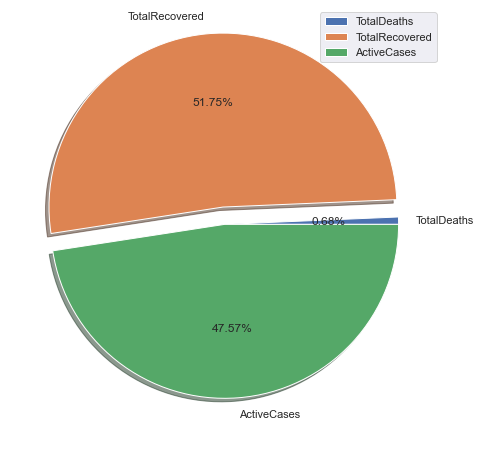

In [64]:
col = ['TotalDeaths','TotalRecovered','ActiveCases']
dataOfVn = df[df['Country,Other']=='Vietnam'][col]
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
plt.pie(dataOfVn.values[0],labels = col,autopct="%1.2f%%",explode=(0,0.1,0),shadow=True)
plt.legend();

- Lí do chọn Pie chart: thích hợp thể hiện cơ cấu các thành phần của một đối tượng cụ thể, thuận lợi cho việc so sánh các thành phần với nhau
- Ý nghĩa:
    - Chúng ta có thể thấy được cơ cấu các thành phần của ca nhiễm Covid 19 ở Việt Nam cũng rất tương đồng với các khu vực khác trên thế giới: tỉ lệ các thành phần đều theo thứ tự: tỉ lệ ca hồi phục > tỉ lệ ca đang nhiễm > tỉ lệ ca tử vong
    - Phần lớn các ca nhiễm đã hồi phục và tỉ lệ ca tử vong rất ít => Tình hình Covid của Việt Nam vẫn đang kiểm soát tốt

### Biểu đồ thể hiện các thông số ca nhiễm ở Việt Nam so với thế giới

In [65]:
columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases','TotalCases']
df_mean = df[columns].mean()
df_VN = df[df['Country,Other']=="Vietnam"][columns]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_VN.to_numpy()[0],
      theta=columns,
      fill='toself',
      name='Viet Nam'
))

fig.add_trace(go.Scatterpolar(
      r=df_mean.to_numpy(),
      theta=columns,
      fill='toself',
      name='World\'s Mean'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5000000]
    )),
)

fig.show()


- Lí do chọn Multiple Trace Radar Chart: có thể so sánh được nhiều thông số cùng lúc của các đối tượng khác nhau
- Ý nghĩa: 
    - Các thông số về tình hình dịch bệnh ở Việt Nam đều cao hơn nhiều so với giá trị trung bình của thể giới
    - Điều này có thể là do dân số Việt Nam khá đông (đứng thứ 15 trên thế giới)